Mean Squared Error: 0.03711379440797686
R-squared: 0.9468960016420045


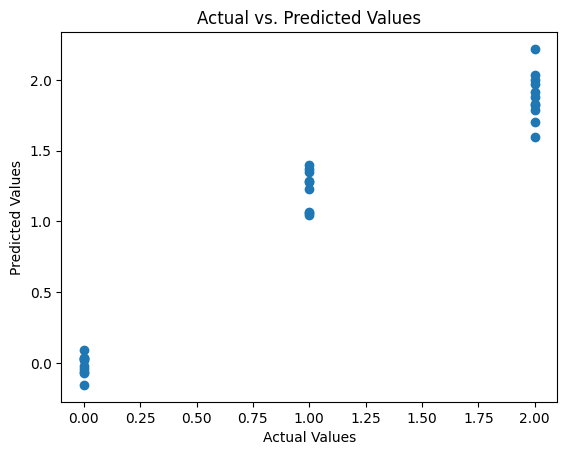

Cross Validation Scores (MSE): [-0.05105182 -0.03875948 -0.07217493 -0.05906597 -0.05534152]
Mean Cross Validation Score (MSE): -0.05527874467416653
KFold Cross Validation Scores (MSE): [-0.06967978 -0.05863728 -0.05481197 -0.04808706 -0.03679198]
Mean KFold Cross Validation Score (MSE): -0.05360161427602335


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'iris.csv' with your actual file path)
data = pd.read_csv('iris.csv')

# Label Encoding for categorical target 'variety' to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['variety'])

# Split data into features (X) and target variable (y)
X = data.drop('variety', axis=1)  # Drop the target variable column
# No need to re-assign 'y' as it's already encoded

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the model's performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# K-fold Cross Validation (using all the variables)
lm = LinearRegression()

# Using cross-validation with 'neg_mean_squared_error' for regression
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("Cross Validation Scores (MSE):", scores)
print("Mean Cross Validation Score (MSE):", np.mean(scores))

# Create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Using KFold cross-validation with 'neg_mean_squared_error'
scores_kfold = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print("KFold Cross Validation Scores (MSE):", scores_kfold)
print("Mean KFold Cross Validation Score (MSE):", np.mean(scores_kfold))
